In [72]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [267]:
def get_b(d0,d1=[]):
    b=0
    for d in [d0,d1]:
        npom = np.sum([d[t] for t in d])
        i=0
        go=True
        while go:
            i+=1
            maxp=np.arange(i,0,-2).sum()
            if maxp>npom:
                go=False
        b = max([i,b])
    return b-1
    

In [236]:
def make_dict(l,m):
    mvals = l['monday'].values
    ix = mvals==m
    tagged = l['tag'][ix].values

    d={}
    for t in np.unique(tagged):
        d[t]=np.sum(tagged==t)
    tags=[]
    occs=[]
    for t in d:
        tags.append(t)
        occs.append(d[t])

    tags=np.array(tags)
    occs=np.array(occs)
    ix = np.flipud(np.argsort(occs))
    d={t:o for t,o in zip(tags[ix],occs[ix])}
    
    return d

In [264]:
def stackem(pomos,b):
    s = np.zeros([int(b/2)+1,b])+np.nan

    i=0;j=0;k=0
    minj=1
    maxj=b
    for t in pomos:
        k+=1
        for n in range(pomos[t]):
            s[i,j]=k
            j+=1
            if j>=maxj:
                i+=1
                j=minj
                minj+=1
                maxj-=1
                
    cmap = plt.cm.jet  # define the colormap
    # extract all colors from the .jet map
    cmaplist = np.array([cmap(i) for i in range(cmap.N)])
    nx = len(pomos)

    c=np.zeros([nx,3])
    c[:,0]=0.2
    c[:,1]=0.7-np.arange(nx)/(2*nx)
    c[:,2]=0.5+0.7*np.arange(nx)/(2*nx)

    cmap = matplotlib.colors.ListedColormap(c)

    plt.pcolormesh(s,cmap=cmap)
    
    tvals = [t for t in pomos]
    for t,k in zip(tvals,np.unique(s)[:-1]):
        i=np.argmax((s==k).sum(axis=1))
        j=np.mean(np.arange(b)[s[i,:]==k])
        plt.text(j+0.5,i+0.5,t,fontsize=14,va='center',ha='center',color=0.9*np.ones(3),fontweight='bold')

    plt.xticks([])
    plt.yticks([])

        
    
    
    

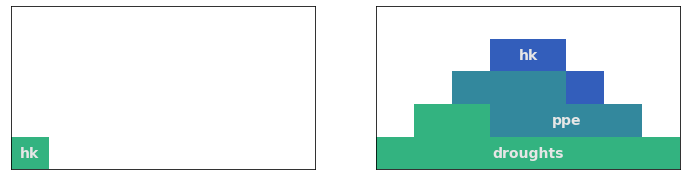

In [272]:
l=pd.read_csv('2022.txt')
m=l['monday'].values
m1 = m[0]
m0 = m[m!=m1][0]
d1=make_dict(l,m1)
d0=make_dict(l,m0)
b = get_b(d0,d1)
plt.figure(figsize=[12,3])
plt.subplot(121)
stackem(d0,b)
plt.subplot(122)
stackem(d1,b)
